# Guided example and challenge

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [3]:
# Define outcome ('partner' – boolean) and predictors
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# 90% of data is training
X_train, y_train = X[:offset], y[:offset]

# 10% is test
X_test, y_test = X[offset:], y[offset:]

__Since we're now working with a binary outcome, we've switched to a classifier. Now our loss function can't be the residuals. Our options are "deviance", or "exponential". Deviance is used for logistic regression, and we'll try that here.__

In [4]:
# 500 iterations, use 2-level-deep trees
# Set model's loss function to deviance
params = {'n_estimators': 500, 'max_depth': 2, 'loss': 'deviance'}
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

# Get predictions from both training and test sets
predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Print accuracy using crosstab
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training accuracy:\n'
    '% Type I errors: {}\n'
    '% Type II errors: {}\n\n'
    'Test accuracy:\n'
    '% Type I errors: {}\n'
    '% Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training accuracy:
% Type I errors: 0.04650845608292417
% Type II errors: 0.17607746863066012

Test accuracy:
% Type I errors: 0.06257668711656442
% Type II errors: 0.18527607361963191


__Unlike decision trees, gradient boost solutions are not terribly easy to interpret on the surface. But they aren't quite a black box. We can get a measure of how important various features are by counting how many times a feature is used over the course of many decision trees.__

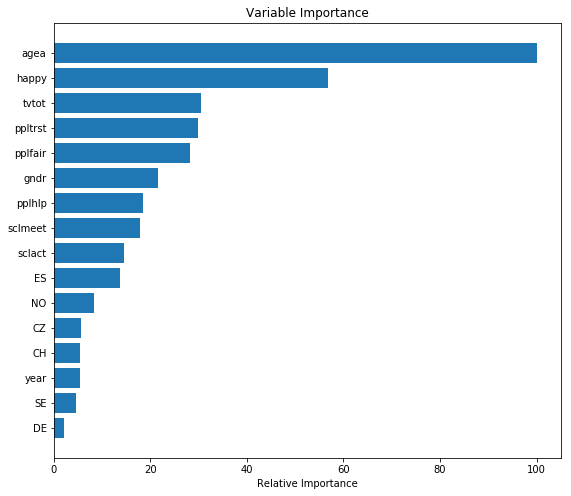

In [5]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

__It appears that age and happiness are the most important features in predicting whether or not someone lives with a partner.__

## DRILL: Improve this gradient boost model

While this model is already doing alright, we've seen from the Type I and Type II error rates that there is definitely room for improvement. 

See how low you can get the error rates to go in the test set, based on your model in the training set. Strategies you might use:

1. Creating new features
2. Applying more overfitting-prevention strategies like subsampling and/or shrinkage
3. More iterations
4. Trying a different loss function
5. Changing the structure of the weak learner – allow more leaves in the tree, etc.

In [6]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


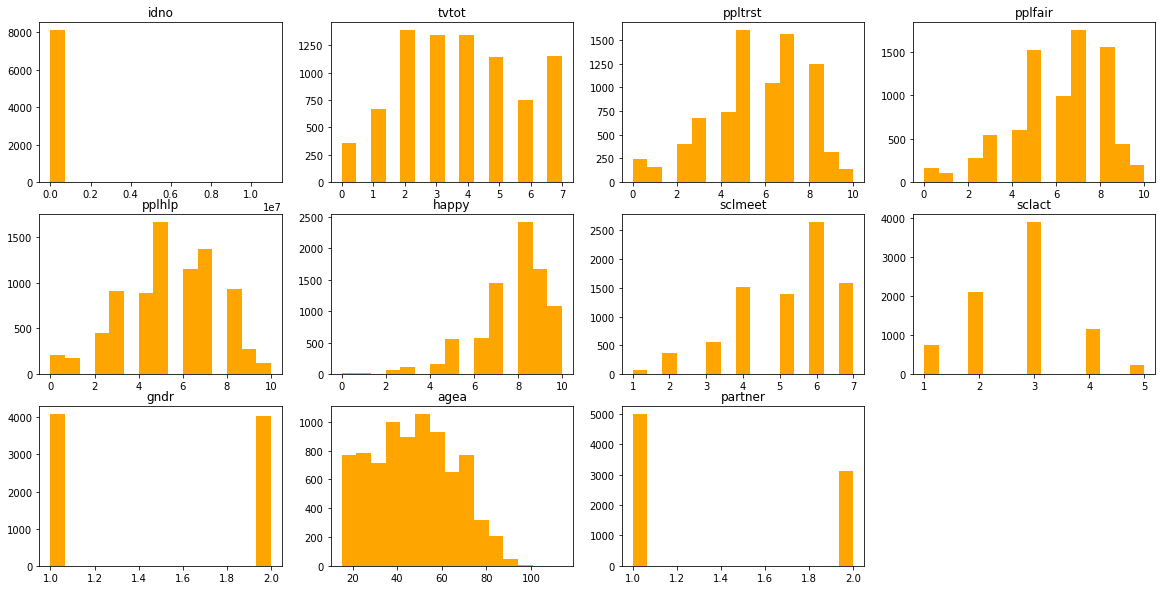

In [7]:
all_features = df.loc[:, df.dtypes == 'float64']

plt.figure(figsize=(20, 10))

for idx, feature in enumerate(all_features):
    plt.subplot(3, 4, idx + 1)
    plt.title(feature)
    plt.hist(df[feature], bins=15, color="orange")
    
plt.show()

idno – outliers: [1.0, 3746.0] , mean: 40226.21885356573 , median: 1749.0
tvtot – outliers: [0.0, 7.0] , mean: 3.8185835276789004 , median: 4.0
ppltrst – outliers: [0.0, 10.0] , mean: 5.57493555910151 , median: 6.0
pplfair – outliers: [1.0, 10.0] , mean: 6.005155271879219 , median: 6.0
pplhlp – outliers: [0.0, 10.0] , mean: 5.321468025039892 , median: 5.0
happy – outliers: [4.0, 10.0] , mean: 7.708481649687001 , median: 8.0
sclmeet – outliers: [1.0, 7.0] , mean: 5.215907696084448 , median: 6.0
sclact – outliers: [1.0, 4.0] , mean: 2.7559837977169512 , median: 3.0
gndr – outliers: [1.0, 2.0] , mean: 1.4963790352276911 , median: 1.0
agea – outliers: [15.0, 103.0] , mean: 47.26218239842887 , median: 47.0
partner – outliers: [1.0, 2.0] , mean: 1.3846814778446053 , median: 1.0


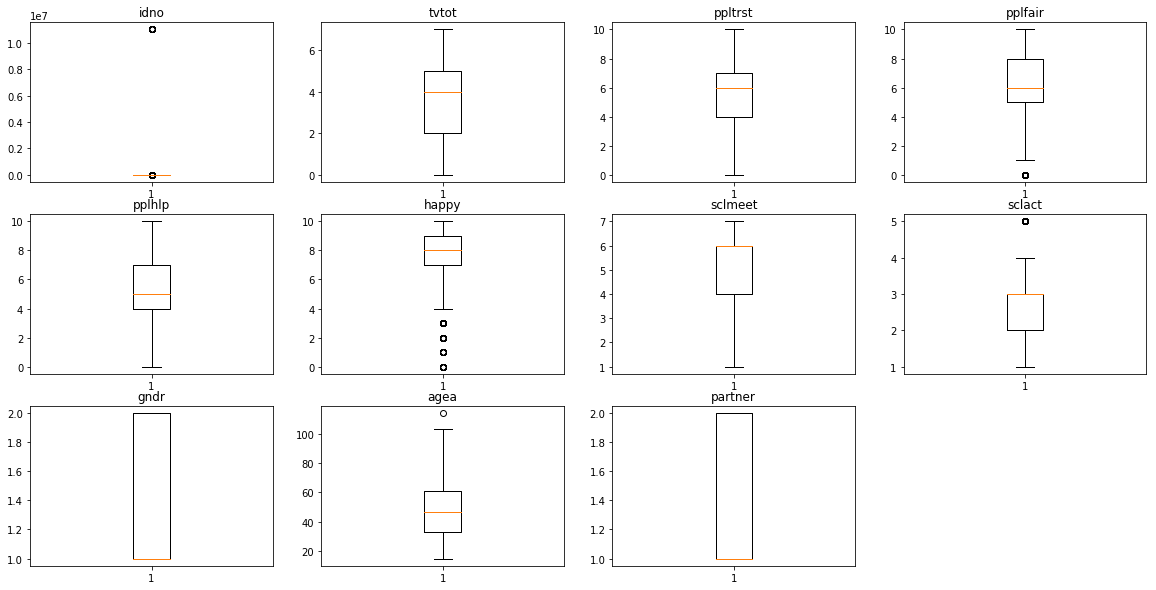

In [8]:
plt.figure(figsize=(20, 10))

for idx, feature in enumerate(all_features):
    plt.subplot(3, 4, idx + 1)
    plt.title(feature)
    the_boxplot = plt.boxplot(df[feature])
    print(feature, '– outliers:', [item.get_ydata()[1] for item in the_boxplot['whiskers']], ', mean:', df[feature].mean(), ', median:', df[feature].median())
    
plt.show()

In [9]:
# Define outcome ('partner' – boolean) and predictors
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# STRATEGY #1: ADD MORE FEATURES
# df['agea > med'] = [1 if x else 0 for x in df['agea'] > df['agea'].median()]
# df['happy > med'] = [1 if x else 0 for x in df['happy'] > df['happy'].median()]
# df['ppltrst > med'] = [1 if x else 0 for x in df['ppltrst'] > df['ppltrst'].median()]
df['scndnvn'] = [1 if x in ['DK', 'NO', 'SE', 'FI'] else 0 for x in df['cntry']]
df['ppl'] = (df['ppltrst'] + df['pplfair'] + df['pplhlp']) / 3
df['scl'] = (df['sclmeet'] + df['sclact']) / 2

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# 90% of data is training
X_train, y_train = X[:offset], y[:offset]

# 10% is test
X_test, y_test = X[offset:], y[offset:]

df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner,scndnvn,ppl,scl
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0,0,6.000000,4.5
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0,0,5.666667,2.5
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0,0,8.000000,4.5
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0,0,6.333333,4.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0,0,6.000000,4.5


In [10]:
from sklearn import preprocessing

all_countries = df['cntry']
names = list(df.columns)
names.remove('cntry')
df = pd.DataFrame(preprocessing.scale(df[names]), columns=names)
df['cntry'] = all_countries

df.head()

,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner,scndnvn,ppl,scl,cntry
0,-0.063638,-1.000614,-0.407496,-1.162180,1.884363,-0.148410,0.169415,-0.150071,1.380169,1.007268,0.695456,-0.790680,-0.793142,0.205637,0.540578,CH
1,-0.063606,-1.000614,1.085923,-0.259493,0.469267,-0.148410,0.750563,-1.540211,-0.838723,1.007268,0.640859,-0.790680,-0.793142,0.018429,-1.562616,CH
2,-0.063605,-1.000614,-1.403108,1.094536,0.940966,1.236578,-0.411732,0.544999,0.270723,-0.992784,-1.270063,1.264734,-0.793142,1.328883,0.540578,CH
3,-0.063601,-1.000614,0.090310,0.191850,-0.002432,0.774915,1.331710,0.544999,-0.838723,1.007268,0.913848,-0.790680,-0.793142,0.392844,0.014779,CH
4,-0.063600,-1.000614,0.588116,0.191850,0.469267,-0.148410,0.169415,1.240069,-0.838723,1.007268,0.422468,-0.790680,-0.793142,0.205637,0.540578,CH


In [18]:
# STRATEGY #2: SUBSAMPLE TO AVOID OVERFITTING
# STRATEGY #3: USE MORE ITERATIONS
# STRATEGY #4: DIFFERENT LOSS FCN (vs. 'deviance')
# STRATEGY #5: CHANGE WEAK LEARNERS (ADD MORE LEAVES)
# 500 -> 1000 iterations, use 2-level-deep trees
params = {'n_estimators': 1000, 'max_depth': 3, 'loss': 'exponential', 'subsample': 0.9}
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

# Get predictions from both training and test sets
predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Print accuracy using crosstab
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training accuracy:\n'
    '% Type I errors: {}\n'
    '% Type II errors: {}\n\n'
    'Test accuracy:\n'
    '% Type I errors: {}\n'
    '% Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training accuracy:
% Type I errors: 0.031642116748499725
% Type II errors: 0.13434260774686307

Test accuracy:
% Type I errors: 0.0834355828220859
% Type II errors: 0.18159509202453988


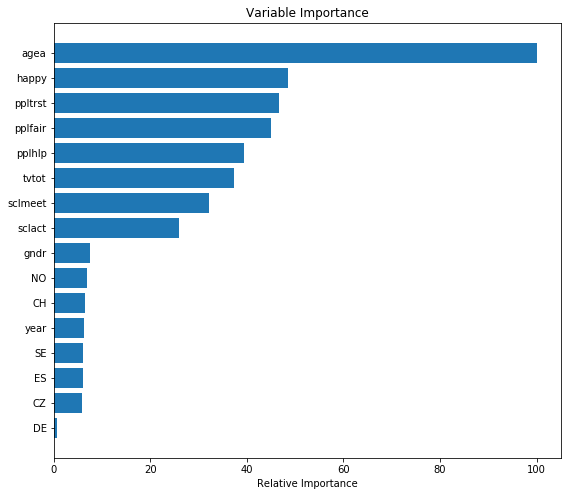

In [12]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()